## Data Cleaning

In [6]:
data = pd.read_excel('Ev Sales.xlsx')
data.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


In [3]:
data.describe()

,2 W,3 W,4 W,BUS,TOTAL
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,16938.729730,14851.351351,1272.567568,82.310811,33144.959459
std,25846.636971,11002.517635,1841.195763,79.696672,38251.453387
min,85.000000,668.000000,3.000000,0.000000,958.000000
25%,1304.250000,7782.250000,187.750000,11.250000,9147.000000
50%,3014.500000,10619.500000,317.500000,74.500000,14526.000000
75%,23599.000000,18641.750000,1545.000000,113.500000,43902.750000
max,105154.000000,45225.000000,8852.000000,331.000000,157788.000000


In [4]:
data.isnull().sum()

YEAR     0
2 W      0
3 W      0
4 W      0
BUS      0
TOTAL    0
dtype: int64

## Detailed plots and chats

In [34]:
data['YEAR'] = pd.to_datetime(data['YEAR']).dt.date
data.head(10)

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141
5,2017-09-01,109,7414,193,0,7716
6,2017-10-01,160,7250,214,0,7624
7,2017-11-01,214,9598,186,11,10009
8,2017-12-01,189,8719,179,0,9087
9,2018-01-01,176,8750,210,29,9165


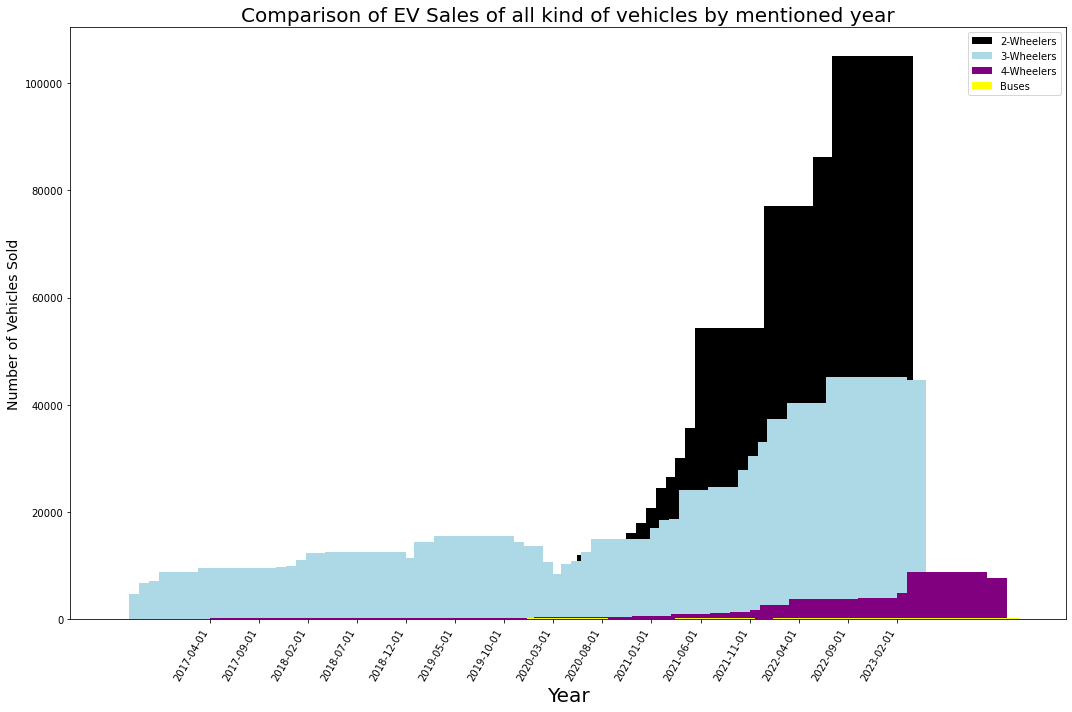

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
bar_width = 8.2
x = np.arange(len(data['YEAR']))

plt.bar(x - bar_width/1.5, data['2 W'], width=bar_width, label='2-Wheelers', color='black')
plt.bar(x - bar_width/2, data['3 W'], width=bar_width, label='3-Wheelers', color='lightblue')
plt.bar(x + bar_width/2, data['4 W'], width=bar_width, label='4-Wheelers', color='purple')
plt.bar(x + bar_width/1.5, data['BUS'], width=bar_width, label='Buses', color='yellow')

plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Vehicles Sold', fontsize=14)
plt.title('Comparison of EV Sales of all kind of vehicles by mentioned year', fontsize=20)


plt.xticks(x[::5], data['YEAR'][::5], rotation=60, ha='right')  
plt.tight_layout() 
plt.legend()
plt.show()




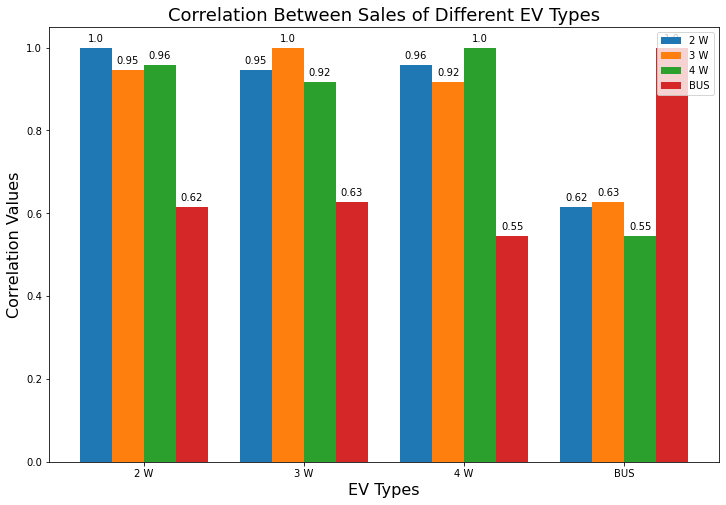

In [35]:
import matplotlib.pyplot as plt
import numpy as np


corr_data = data[['2 W', '3 W', '4 W', 'BUS']].corr()


labels = corr_data.columns
correlation_values = corr_data.values


bar_width = 0.2
x = np.arange(len(labels))


fig, ax = plt.subplots(figsize=(12, 8))


for i in range(len(labels)):
    bars = ax.bar(x + i * bar_width, correlation_values[i], bar_width, label=labels[i])
    
    
    for bar in bars:
        yval = bar.get_height() 
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), 
                ha='center', va='bottom', fontsize=10) 


ax.set_xlabel('EV Types', fontsize=16)
ax.set_ylabel('Correlation Values', fontsize=16)
ax.set_title('Correlation Between Sales of Different EV Types', fontsize=18)


ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(labels)


ax.legend()

plt.show()



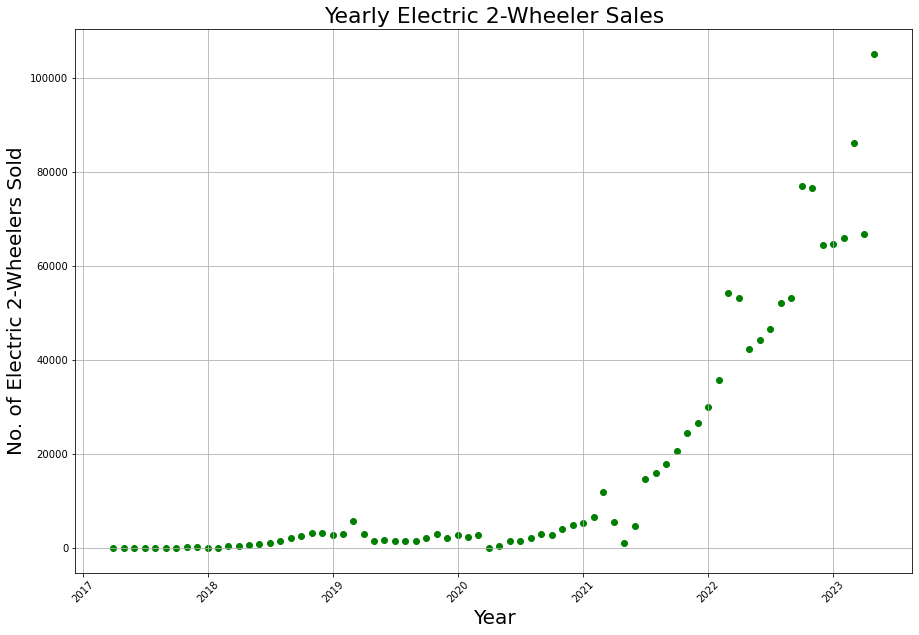

In [40]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create a scatter plot
plt.scatter(data['YEAR'], data['2 W'], color='g', marker='o')

# Set labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('No. of Electric 2-Wheelers Sold', fontsize=20)
plt.title('Yearly Electric 2-Wheeler Sales', fontsize=22)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.show()

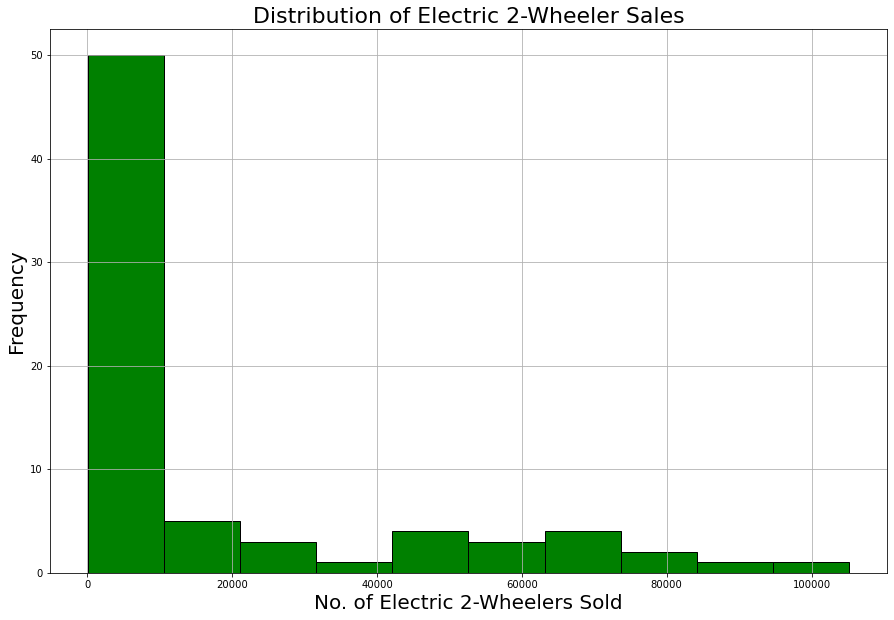

In [41]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create a histogram
plt.hist(data['2 W'], bins=10, color='g', edgecolor='black')

# Set labels and title
plt.xlabel('No. of Electric 2-Wheelers Sold', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Distribution of Electric 2-Wheeler Sales', fontsize=22)

# Display the plot
plt.grid(True)
plt.show()

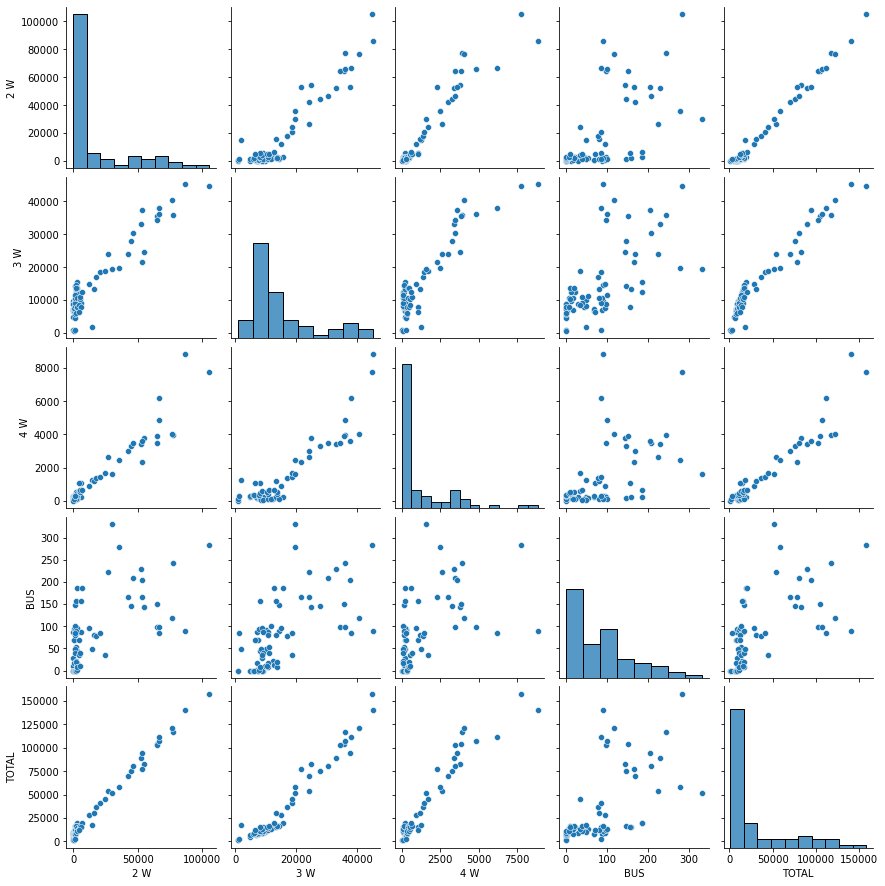

In [33]:
import seaborn as sns
sns.pairplot(data)